# Tabular Q Learning, a Tic Tac Toe player that gets better and better #
Time for our first computer player which actually uses a machine learning technic to play. The machine learning approach we will use is called *Reinforcement Learning*, and the particular variant we will use is called *Tabular Q Learning*. In the following we will introduce all 3 concepts, *Reinforcement Learning*, *Q function*, and *Tabular Q function*, and then put them all together to create a Tabular Q-Learning Tic Tac Toe player.

## What is Reinforcement learning?
The basic idea behind reinforcement learning is quite simple: Learn by doing and observing what happens. This concept is motivated by how humans seem to learn in many cases: We do something and if it had positive consequences we are likely to do it again, whereas if it had negative consequences we are generally less likely to do it again.

At each step the player (also called agent) takes a good look at the current environment and makes an "educated guess" of what it thinks is the best action. After executing an action, it will learn how that action has changed the environment and also receive feedback on how good or bad its action was in that particular situation: If it chose a good action it will get a positive reward, if it chose a bad action it will get a negative reward. Based on that feedback, it can then adjust its "educated guessing process". When it encounters the same situation again in the future, it should hopefully be more more likely to chose the same action again if the feedback was positive and more likely to chose a different action if it was negative.

The following graphic illustrates this process:
![Title](./Images/Reinforcement.PNG)

In many situations, the feedback the agent gets after chosing one action will not necessarily be very strong or conclusive. E.g. when making a move at the beginning of a game of Tic Tac Toe, it will be unclear if the chosen action was good or bad and thus the reward will be neutral and thus the feedback it gets is of very limited utility. At the end of the game however, it will get very strong feedback: It won, it lost, or the game was a draw. One fundamental concept of *Reinforcement Learning* is to have a process of attributing that final reward back to previous actions as well to reflect the fact that they contributed to the ultimate success or failure in some way. Based on the assumption, that the longer in the past an action has happened, the less likely it is that it was instrumental in the final outcome, we will discount the final reward at each step back in time.

Time for an example: Let's assume we have played a game of Tic Tac Toe chosing moves based on our current best guesses and won. None of our moves got a positive or negative reward apart from the very last one which got a 1 as it won the game. Now, it is more than just likely that the vicotry was not only because of the quality of the last move, but because, at least some of, our previous moves were "good" moves as well. The further in the past, the less likely it is that they contributed significantly to the outcome. So, we might give the second last move a discounted reward of 0.8, the one before that a reward of 0.5, the one before that a reward of 0.1 etc.

Over many games, the theory goes, that if there are moves that are particularly strong and important at the beginnig of the game they will still end up with a very high likelyhood of getting chosen as they will receive positive rewards over and over again, adding up over time despite the fact that they only ever received highly discounted rewards. If I remember correctly, with certain constraints on the set-up and number of iterations this can be proven to be true.

A more detailed introduction to Reinforcement Learning can be found on [Wikipedia](https://en.wikipedia.org/wiki/Reinforcement_learning) and the ultimate, authorative introduction is probably the book [Reinforcement Learning - An Introduction](https://mitpress.mit.edu/books/reinforcement-learning) by Richard S. Sutton and Andrew G. Barto. Draft versions of this book seem to be easily findable and downloadable over the internet, but as I'm not sure about the legality of those I will not provide links here. In the January 2018 Draft version, the tabular Q-learning approach from this tutorial can be found in part 1, chapter 6.5 (" Part 1: Tabular Solution Methods -> 6 Temporal Difference Learning -> 6.5 Q-Learning: Off-policy TD Control")

## What is the Q function?
The next concept we need to understand is the Q function. The Q stands for *Quality* and the Q function is the function that assigns a quality score to an State - Action pair. I.e. given a state $S$ and an action $A$ the function $Q(S,A) \mapsto I\!R$ will return a real number reflecting the quality of doing this action $A$ in the state $S$.

We will assume that this function exists and is deterministic, but its concrete mapping of states and actions to quality values is not necessarily known to us. Q-learning is all about learning this mapping and thus the function Q.

If you remember our previous tutorial about Min-Max, you might have noticed that the values we computed for each state there seems very similar to the values the Q function returns. And indeed they are. In MinMax we assigned quality values to states, whereas here we assign quality values to action that are potentially chosen in a given state. In a deterministic environment like Tic Tac Toe, where performing a certain action in a given state will always result in the same next state, the value of that action in that state is indeed identical to the value of the following state. 

<div class="alert alert-block alert-info"> **Side Note**: In other environments, this relationship can be a bit more complicated. In particular in environments where an action can probabilisticly result in any one of a number of different next states, the value of the action is not that directly tied to a particular next state. E.g. imagine you have a pudding which for all intents and purposes looks fantastic. However, as the saying goes, you can't tell how good it actually is without eating it. So the action of eating the pudding can result in different outcomes: delight, meh, disgust, ..., each with their own probability. The Quality of the action "eating the pudding" is thus a much more complicated function of the possible outcomes and their probabilities.</div>

## What is the tabular Q function?
Tabular in this context simply means that we will store the Q function in a lookup table. I.e. we create a table where we store the Q value for each possible State and Move. It may look something like this (the values in this exmaple are made up and not the real Q function for Tic Tac Toe):
![Title](./Images/QTable.PNG)

## How Do we use the Q function to play Tic Tac Toe?
Assuming we know the Q function, we can play Tic Tac Toe, by looking up the Q values for all possible moves in the current situation and chose the one with the highest value. If there is more than one possible move with the same highest value, we chose randomly amongst them. Having the highest value means that this move is the best move in this situation.

## How do we discover the actual Q function?
This is where we put all the above together:

First we create a Q table with a row for every possible state and initialze the values to be the same for every state. I.e. all moves are equally likely to be picked.

Now we use Reinforcement Learning to learn the real Q function. We do this by repeatedly playing the game against an opponent and at the end of each game update the Q value of all moves in the game according to the game result. For a win we will award a reward of 1, for a loss a reward of 0 and for a draw we will give a reward of 0.5.

The final move will get the reward as its new Q value. For all the other moves in that game we will use the following formula to update their Q values:

$$ Q(S,A) = Q(S,A) + \alpha * (\gamma * max_a Q(S', a) - Q(S,A))$$

with $S$ being the current state, $A$ the current action, $S'$ the state after doing $A$, $\alpha$ being the learning rate, $\gamma$ being the discount factor, and $max_a Q(S', a)$ the highest Q value of any move in the next state $S'$, i.e. the Q value of the best move in the following state.

We can also rewrite this formula as:

$$ Q(S,A) = (1-\alpha) * Q(S,A) + \alpha * \gamma * max_a Q(S', a)$$

which maybe makes it easier to see what the learning rate does. It is basically determining how much we change our current Q value towards the discounted maximum of its successors. If we would chose $\alpha$ as 0, we wouldn't change anything, if we chose $\alpha$ as 1 we completely replace the old value with the new value, if we chose $\alpha$ as 0.5, we would get the average between the old value and the new value. In the computer player below we will chose $\alpha$ to be 0.9 and $\gamma$ to be 0.95.

<div class="alert alert-block alert-info">
A short detour to explain this formula step by step: Let's start with the inner-most bit:

$$ Q(S,A) = max_a Q(S', a)$$

This basically says: If we do action $A$ in state $S$ we will get to state $S'$ and the value of doing action $A$ in state $S$ should be the same as the value of the best possible action in that next state $S'$. 
<br/>
This is seen as being a bit too optimistic, so we want to actually say something more like: The value of doing action $A$ in state $S$ should be *almost* as good as the value of the best possible action in that next state $S'$. I.e. we need to apply a discount to that value. This will also reflect the fact that the longer back an action was in time, the less crucial it likely was for the end result. We achieve this by multiplying with a discount value $\gamma$ with $ 0 < \gamma < 1 $: 

$$ Q(S,A) = \gamma * max_a Q(S', a)$$

Finally we don't want to completely replace the old Q-value of our action with each update. What if we just got lucky and out opponent made a mistake, i.e. we won, but the action wasn't actually that good? In order to account for this, we set the new Q value to a value somewhere between the old Q value and the potential new Q value. We use an additional parameter, the learning rate $\alpha$ to set how much the new value will change the old value and get the final formula as above:

$$ Q(S,A) = (1-\alpha) * Q(S,A) + \alpha * \gamma * max_a Q(S', a)$$

</div>

By playing game after game and updateing the Q values after each game, the Q function will converge to the true Q values for Tic Tac Toe.

The one thing we haven't discussed yet is what value we chose to initialze the Q table. This value does actually matter. 

If we initialze  all values with 0, the player will be very "pessimistic", i.e. it will assume every move leads to a loss, and is likely to settle for anything that is better than losing. If the player achieves a draw before its first win, it will increase the values of the moves that lead to the draw while all other move values will still be 0. In subsequent games it will favour using those moves again over trying something new with the potential chance of actually winning.

On the other hand, if we initialize the values to 1, the player will be very optimisitic and expect every move to lead to victory. The player is thus less likely to settle for a draw as best possible outcome and will actively explore other options first. The downside however is that it will learn quite slowly as it will exhaust any other option before settling on a strategy that leads to a draw.

Feel encouraged to try different values in the code below and compare performance. By default the player will initialize the values with 0.6, i.e. be slightly optimistic but not take too long to be dissuaded from a bad choice.  In practice, as we know a draw is the best outcome one can expect, a value of 0 should converge fastest.

## Putting it all together
The class [TQPlayer](./tic_tac_toe/TabularQPlayer.py) implements an agent playing Tic Tac Toe and learning its Q function on the way. Let's pit it against some of the players we have previously created and see how it goes. We will have it play several battles of 100 games against the same player and see how its performance improves.

First we define a new utility function `eval_players` which takes 2 players and the number of battles as input, then executes the battles and prints a plot of the results. You can also optionally pass the number of games per battle.


In [64]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY

def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

First we let it play against the deterministic Min Max player. The Min Max player will get first move.

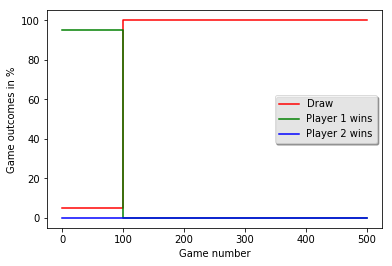

In [65]:
player1 = MinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 5)

The Tabular Q-learning player learns to play optimally against the deterministic MinMax agent in less than 100 games. Let's see how it does against the non-deterministic Min Max Agent:

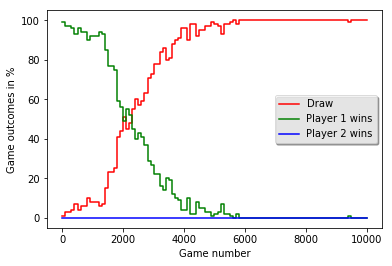

In [72]:
player1 = RndMinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)

It is struggling quite a bit more now, needing about 6000 games to learn a close to perfect strategy. Let's see how the initial values of the Q function impact things. First, let's initialize with 1.0:

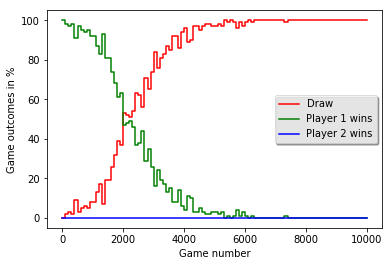

In [75]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=1.0)
eval_players(player1, player2, 100)

Not actually much worse, but the learning progress does seem a little bit less smooth. Let's try initial values of close to 0 (setting it to 0 will not work with our current code as a loss would not decrease the value further, i.e. once it choses a losing strategy it will never play anything else):

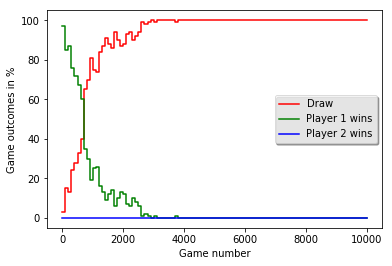

In [78]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=0.001)
eval_players(player1, player2, 100)

In contrast to the previous one, where the player was expecting to win and tried every possible way to achieve this, this time the player is quite happy to achieve a draw and settles for it much more quickly.

Can the TQPlayer learn from a player that does not play well? Let's see how it does against itself:

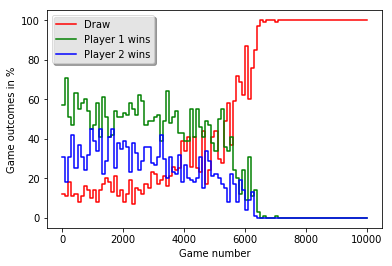

In [79]:
player1 = TQPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

Yes, after about 7000 games, it seems it has found a strategy to not lose against itself. How does this trained player do against a Min Max?

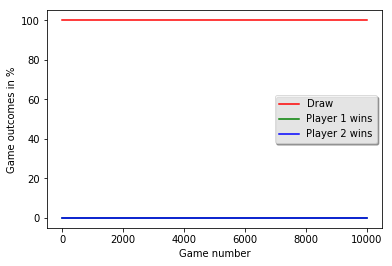

In [80]:
player1 = RndMinMaxAgent()

eval_players(player1, player2, 100)

Even against the Min Max player, which it has never played before, it does not lose any games. We created a player that can, just by playing against itself, learn how to play Tic Tac Toe perfectly against a Min Max opponent.

Now, how does it perform against a RandomPlayer:

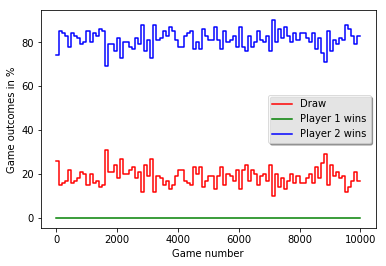

In [81]:
player1 = RandomPlayer()

eval_players(player1, player2, 100)

Again, no losses. It actually wins quite a lot of games now. 

One last thing we'll try is training a new TQPlayer against a Random Player:

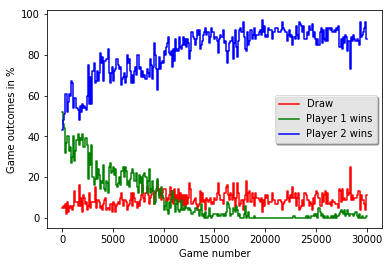

In [86]:
player1 = RandomPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 300)

Now this is interesting! Even after 30,000 games, it still loses the odd game. However, it does seem to win more games against the Random Player based on this strategy than with the no-loss strategy from before. I'm not 100% sure what is going on there, but I suspect that it found a strategy that is a bit risky, but statiscally better than the conservative no-loss strategy. I.e. it found some situations where, when it plays a move that may cause it to lose the game, chances are that the Random Player will make a mistake and it will actually win. It seems to be inclined to take this risk in certain situations.

## Conclusions TQPlayer vs Min Max

Both players have a severe limitation: They are only feasible for games with a small number of states. The Min Max player needs to be able to traverese the tree of possible continuations which is not feasible if there are as many as there are in chess or go. The TQPlayer needs to store the Q values for every state, which is also not feasible for games like chess or go.

The Min Max player has the advantage that it plays perfectly from the start. No need to learn anything. The TQPlayer on the other hand needs to play a lot of games to play well.

The TQPlayer however is able to learn effective strategies against opponents which play less than perfect. Min Max always assumes the opponent will make the best possible move in every situation. If that's not the case, the Min Max player is not able to exploit this flaw in its opponent. The TQPlayer however is more flexible and can learn an optimal stragegy against any opponent.

Feel encouraged to experiment yourself with various different settings and see how it goes!